In [175]:
import pandas as pd
import datetime

import json as json
from pandas.io.json import json_normalize

import numpy as np
import os
import scipy.optimize as sco
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
#import pandas_profiling


In [176]:
array_dataframe = []
dados = pd.DataFrame([])
scoins = []

folder_candle = 'Operacoes'

for folder in os.scandir(folder_candle):
    scoins.append(folder.name)
    for entry in os.scandir(folder):
        if entry.is_file():
            coin_symbol = (os.path.splitext(entry.name)[0])        
            with open(entry.path) as d:            
                coin_hist = json.load(d);
            df = json_normalize(coin_hist);

            df['coin'] = folder.name
            df['amount'] = pd.to_numeric(df['amount'].replace('.',','))
            df['rate'] = pd.to_numeric(df['total'].replace('.',','))
            df['total'] = pd.to_numeric(df['total'].replace('.',','))
            df['date'] = pd.to_datetime(df['date'])            
            df['day'] = pd.to_datetime(df['date'],format='%Y-%m-%d').dt.date
            
            array_dataframe.append(df)       
        
dados = pd.concat(array_dataframe)

dados = dados.replace([np.inf, -np.inf], np.nan)
dados = dados.fillna(0)
#dados.set_index('date','coin'], inplace= True)
dados.head()

,amount,date,globalTradeID,rate,total,tradeID,type,coin,day
0,1.011857,2017-06-30 02:59:58,180965341,2504.041676,2504.041676,5326558,sell,USDT_BTC,2017-06-30
1,0.701143,2017-06-30 02:59:58,180965340,1735.119424,1735.119424,5326557,sell,USDT_BTC,2017-06-30
2,0.799909,2017-06-30 02:59:46,180965161,1980.984991,1980.984991,5326556,buy,USDT_BTC,2017-06-30
3,0.000091,2017-06-30 02:59:46,180965160,0.226574,0.226574,5326555,buy,USDT_BTC,2017-06-30
4,1.719875,2017-06-30 02:59:44,180965150,4256.173623,4256.173623,5326554,sell,USDT_BTC,2017-06-30


In [177]:
grouped_data = dados.groupby('coin', as_index=False)

sorted_grouped_data = sorted(
    grouped_data,  # iterates pairs of (key, corresponding subDataFrame)
    key=lambda x: len(x[1]),  # sort by number of rows (len of subDataFrame)
    reverse=True  # largest first
)

grouped_data.describe()

amount                                                                     \
     count       mean        std           min       25%       50%        75%   
0  50000.0   0.436467   1.141295  1.000000e-08  0.009985  0.086915   0.409694   
1  50000.0   4.910386  12.991579  1.000000e-08  0.100000  0.898345   3.949046   
2  50000.0  16.481979  49.057512  1.000000e-08  0.138878  2.000000  12.218207   
3  50000.0   1.328321   4.896167  1.000000e-08  0.003674  0.056367   0.709800   

               globalTradeID                  ...            total  \
           max         count          mean    ...              75%   
0    44.477456       50000.0  1.803461e+08    ...      1020.071201   
1   461.772893       50000.0  1.802368e+08    ...      1151.446526   
2  2483.153020       50000.0  1.781649e+08    ...       486.762678   
3   198.681090       50000.0  1.771180e+08    ...       232.313449   

                  tradeID                                                  \
             max    count       mean           std        min         25%   
0  112083.189448  50000.0  5301558.5  14433.901067  5276559.0  5289058.75   
1  131487.861818  50000.0  2231463.5  14433.901067  2206464.0  2218963.75   
2   86910.355712  50000.0  1001191.5  14433.901067   976192.0   988691.75   
3   61693.156650  50000.0   627114.5  14433.901067   602115.0   614614.75   

                                     
         50%         75%        max  
0  5301558.5  5314058.25  5326558.0  
1  2231463.5  2243963.25  2256463.0  
2  1001191.5  1013691.25  1026191.0  
3   627114.5   639614.25   652114.0  

[4 rows x 40 columns]

In [178]:
seg_semestr2017 = grouped_data.apply(lambda g: g[(g['date'] > datetime(2017,6,1)) & (g['date'] < datetime(2018,1,1)) ])
seg_semestr2017.set_index('date', inplace=True)
seg_semestr2017.head()

,amount,globalTradeID,rate,total,tradeID,type,coin,day
date,,,,,,,,
2017-06-30 02:59:58,1.011857,180965341,2504.041676,2504.041676,5326558,sell,USDT_BTC,2017-06-30
2017-06-30 02:59:58,0.701143,180965340,1735.119424,1735.119424,5326557,sell,USDT_BTC,2017-06-30
2017-06-30 02:59:46,0.799909,180965161,1980.984991,1980.984991,5326556,buy,USDT_BTC,2017-06-30
2017-06-30 02:59:46,0.000091,180965160,0.226574,0.226574,5326555,buy,USDT_BTC,2017-06-30
2017-06-30 02:59:44,1.719875,180965150,4256.173623,4256.173623,5326554,sell,USDT_BTC,2017-06-30


Text(0.5,1,'Amount x Date')

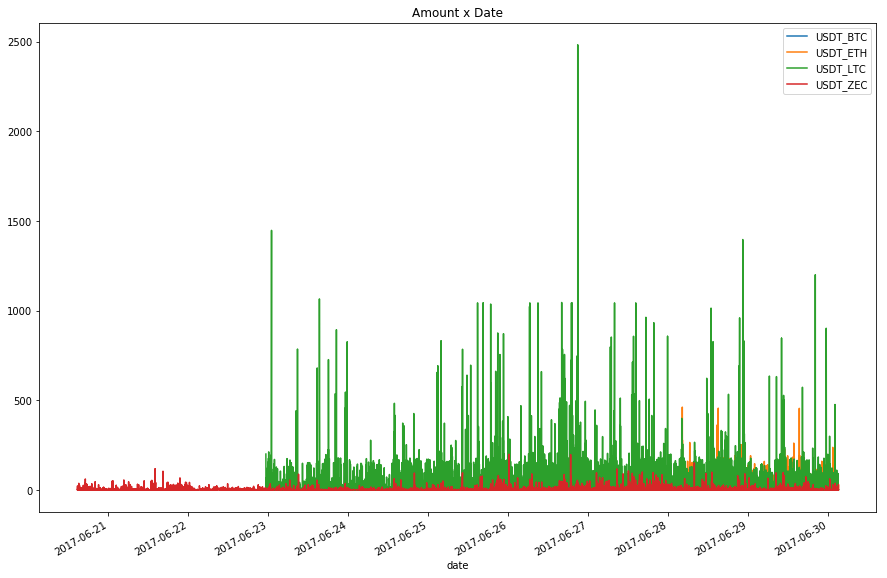

In [179]:
fig, ax = plt.subplots(figsize=(8,6))

for scoin in scoins:
    dados[dados.coin == scoin].plot(kind='line', x='date', y='amount', figsize=(15,10), ax=ax, label=scoin)    
    
plt.title('Amount x Date')   

Text(0.5,1,'Amount x Date')

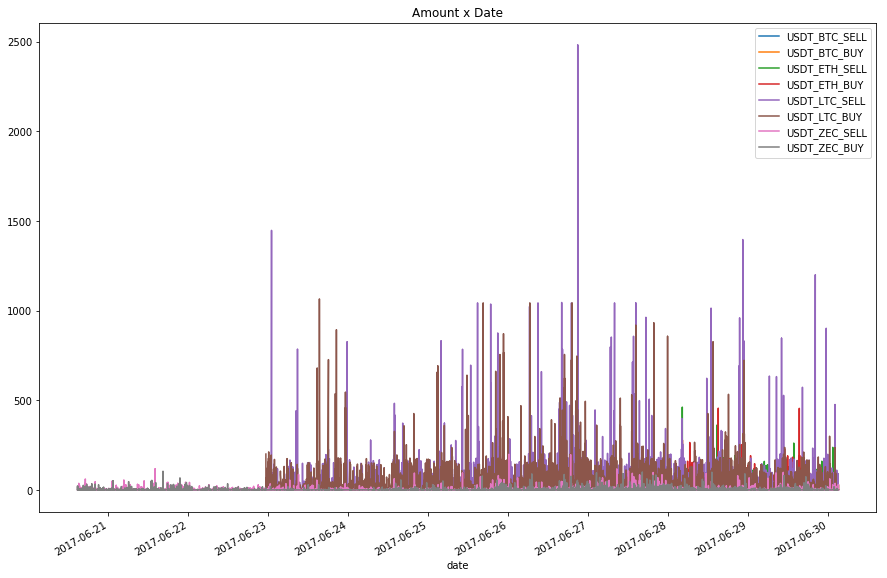

In [180]:
fig, ax = plt.subplots(figsize=(8,6))

for scoin in scoins:
    dados[(dados.coin == scoin) & (dados.type == 'sell')].plot(kind='line', x='date', y='amount', figsize=(15,10), ax=ax, label=scoin+'_SELL')    
    dados[(dados.coin == scoin) & (dados.type == 'buy')].plot(kind='line', x='date', y='amount', figsize=(15,10), ax=ax, label=scoin+'_BUY')    
    
plt.title('Amount x Date')   

Text(0.5,1,'Amount x Date - ZEC x BTC')

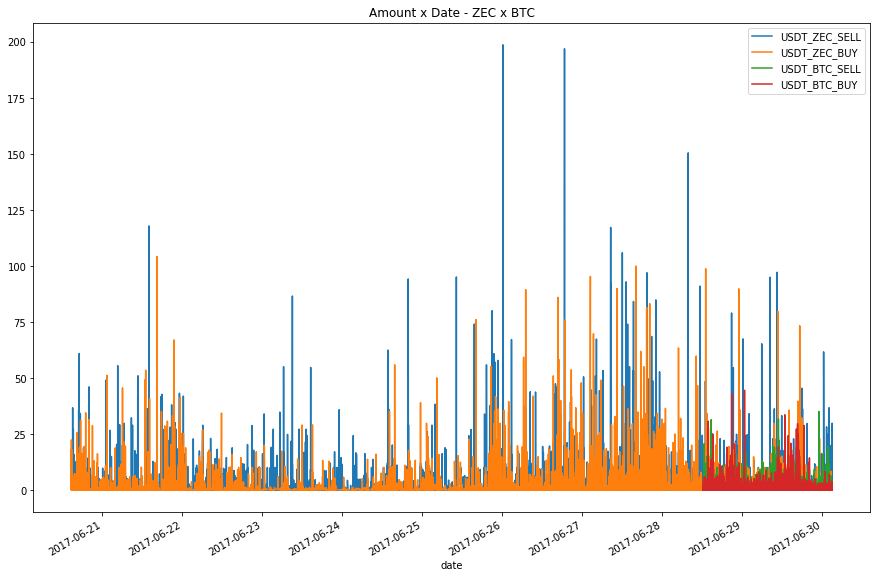

In [181]:
fig, ax = plt.subplots(figsize=(8,6))

scoin = 'USDT_ZEC'
coin2 = 'USDT_BTC'
dados[(dados.coin == scoin) & (dados.type == 'sell')].plot(kind='line', x='date', y='amount', figsize=(15,10), ax=ax, label=scoin+'_SELL')    
dados[(dados.coin == scoin) & (dados.type == 'buy')].plot(kind='line', x='date', y='amount', figsize=(15,10), ax=ax, label=scoin+'_BUY')    
dados[(dados.coin == coin2) & (dados.type == 'sell')].plot(kind='line', x='date', y='amount', figsize=(15,10), ax=ax, label=coin2+'_SELL')    
dados[(dados.coin == coin2) & (dados.type == 'buy')].plot(kind='line', x='date', y='amount', figsize=(15,10), ax=ax, label=coin2+'_BUY')    


plt.title('Amount x Date - ZEC x BTC')   

In [182]:
n_dt = pd.DataFrame([])

n_dt['date'] = dados['day'];
n_dt['amount'] = dados['amount'];
n_dt['rate'] = dados['rate'];
n_dt['type'] = dados['type'];
n_dt['coin'] = dados['coin'];

n_dt = n_dt.groupby(by=['date','coin','type'])
n_dt.describe()

amount                                      \
                            count       mean        std           min   
date       coin     type                                                
2017-06-20 USDT_ZEC buy    1929.0   0.756074   2.704211  9.000000e-08   
                    sell   1483.0   1.186854   3.938334  5.000000e-08   
2017-06-21 USDT_ZEC buy    1963.0   1.436387   5.045894  1.000000e-08   
                    sell   3053.0   1.428879   4.788740  1.000000e-08   
2017-06-22 USDT_LTC buy      62.0  11.757730  30.298010  1.000000e-07   
                    sell     59.0   7.842842  23.265325  1.000000e-08   
           USDT_ZEC buy    1380.0   1.207259   2.980925  8.000000e-08   
                    sell   1625.0   1.042410   2.888239  1.000000e-08   
2017-06-23 USDT_LTC buy    1565.0  17.443410  58.194475  7.000000e-08   
                    sell   2585.0  10.740225  45.027212  2.000000e-08   
           USDT_ZEC buy     996.0   0.504566   2.071435  7.000000e-08   
                    sell   1284.0   1.288779   4.600693  2.000000e-08   
2017-06-24 USDT_LTC buy    2652.0  14.590316  32.039080  1.000000e-08   
                    sell   2693.0  12.782008  31.830610  4.000000e-08   
           USDT_ZEC buy    2058.0   0.569333   2.591225  1.000000e-08   
                    sell   2081.0   0.813787   3.429456  1.000000e-08   
2017-06-25 USDT_LTC buy    3049.0  22.057495  61.905690  1.000000e-08   
                    sell   3257.0  18.221874  55.214700  5.000000e-08   
           USDT_ZEC buy    2992.0   0.948180   3.837645  1.000000e-08   
                    sell   2438.0   1.314241   4.898061  1.000000e-08   
2017-06-26 USDT_LTC buy    4917.0  18.214765  51.758930  1.000000e-08   
                    sell   4586.0  18.454556  65.935840  1.000000e-08   
           USDT_ZEC buy    3584.0   1.503831   5.234055  2.000000e-08   
                    sell   2971.0   1.888319   7.942356  1.000000e-08   
2017-06-27 USDT_LTC buy    4982.0  17.593334  44.069158  1.000000e-08   
                    sell   3987.0  18.564973  56.433380  1.000000e-08   
           USDT_ZEC buy    6056.0   1.359116   4.797993  1.000000e-08   
                    sell   3890.0   1.900278   6.673155  1.000000e-08   
2017-06-28 USDT_BTC buy   11540.0   0.367779   1.118207  2.000000e-08   
                    sell   9481.0   0.433740   1.022110  1.000000e-08   
           USDT_ETH buy   13048.0   5.247592  13.992626  1.000000e-08   
                    sell  11720.0   4.725800  12.805423  1.000000e-08   
           USDT_LTC buy    3851.0  16.545771  40.003249  1.000000e-08   
                    sell   5037.0  15.581640  47.129547  1.000000e-08   
           USDT_ZEC buy    2663.0   1.471506   4.760734  1.000000e-08   
                    sell   2540.0   1.334448   5.025164  1.000000e-08   
2017-06-29 USDT_BTC buy   13849.0   0.441367   1.231205  2.000000e-08   
                    sell  13389.0   0.498765   1.151623  1.000000e-08   
           USDT_ETH buy   11488.0   4.712937  12.671263  1.000000e-08   
                    sell  12246.0   4.854722  11.924687  1.000000e-08   
           USDT_LTC buy    3332.0  12.431288  25.022290  1.000000e-08   
                    sell   3001.0  14.327762  47.533583  1.000000e-08   
           USDT_ZEC buy    2357.0   1.447623   4.060152  2.000000e-08   
                    sell   2394.0   1.568614   5.289857  1.000000e-08   
2017-06-30 USDT_BTC buy     873.0   0.365192   0.688397  1.000000e-06   
                    sell    868.0   0.412009   1.324955  1.000000e-08   
           USDT_ETH buy     722.0   3.905607   9.818972  5.000000e-08   
                    sell    776.0   6.764640  19.735087  6.000000e-08   
           USDT_LTC buy     145.0  20.409607  43.219347  6.000000e-08   
                    sell    240.0  11.182292  36.492307  1.000000e-08   
           USDT_ZEC buy     112.0   0.883202   2.188273  4.200000e-07   
                    sell    151.0   2.614487   7.374474  3.100000e-07   

           

In [183]:
#dados.date.unique()

In [184]:
for name,group in n_dt:
    nv = {}
   
    nv['day'] = group.date.tolist()[0]
    nv['coin'] = group.coin.tolist()[0]
    nv['amount'] = group.amount.sum()
    nv['rate'] = group.rate.mean()
    nv['type'] = group.type.tolist()[0]
    #print(nv)
  

In [185]:
novo = []
novo_df = pd.DataFrame([])

for name,group in n_dt:
    nv = {}
    nv['day'] = group.date.tolist()[0]
    nv['date'] = group.date.tolist()[0]
    nv['coin'] = group.coin.tolist()[0]
    nv['coin_type'] = group.coin.tolist()[0]+'_'+group.type.tolist()[0]
    nv['amount'] = group.amount.sum()
    nv['rate'] = group.rate.mean()
    nv['type'] = group.type.tolist()[0]
    novo.append(nv)      

novo_df = pd.DataFrame(novo)
novo_df.set_index('day', inplace=True)
novo_df.head()    

,amount,coin,coin_type,date,rate,type
day,,,,,,
2017-06-20,1458.465854,USDT_ZEC,USDT_ZEC_buy,2017-06-20,315.260613,buy
2017-06-20,1760.103960,USDT_ZEC,USDT_ZEC_sell,2017-06-20,494.408419,sell
2017-06-21,2819.627252,USDT_ZEC,USDT_ZEC_buy,2017-06-21,549.446733,buy
2017-06-21,4362.367838,USDT_ZEC,USDT_ZEC_sell,2017-06-21,546.451479,sell
2017-06-22,728.979244,USDT_LTC,USDT_LTC_buy,2017-06-22,536.857037,buy


Text(0.5,1,'Amount x Date - ZEC x BTC')

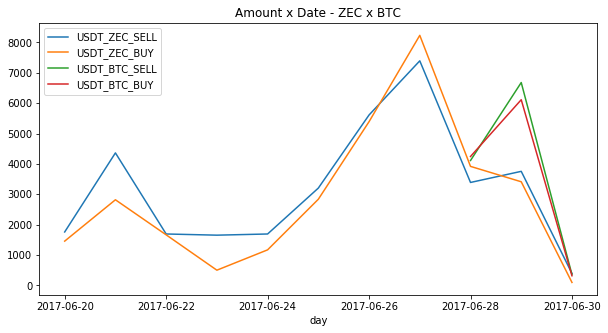

In [186]:
fig, ax = plt.subplots(figsize=(8,6))

scoin = 'USDT_ZEC'
coin2 = 'USDT_BTC'
novo_df[(novo_df.coin == scoin) & (novo_df.type == 'sell')].plot(kind='line', y='amount', figsize=(10,5), ax=ax, label=scoin+'_SELL')    
novo_df[(novo_df.coin == scoin) & (novo_df.type == 'buy')].plot(kind='line', y='amount', figsize=(10,5), ax=ax, label=scoin+'_BUY')    
novo_df[(novo_df.coin == coin2) & (novo_df.type == 'sell')].plot(kind='line', y='amount', figsize=(10,5), ax=ax, label=coin2+'_SELL')    
novo_df[(novo_df.coin == coin2) & (novo_df.type == 'buy')].plot(kind='line', y='amount', figsize=(10,5), ax=ax, label=coin2+'_BUY')    


plt.title('Amount x Date - ZEC x BTC')   

Text(0.5,1,'Amount x Date - ZEC x BTC')

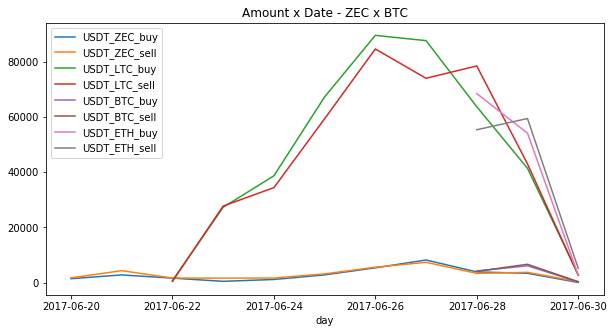

In [187]:
fig, ax = plt.subplots(figsize=(8,6))

for coin_type in novo_df.coin_type.unique():
    #print(novo_df[novo_df.coin_type == coin_type].amount)
    novo_df[novo_df.coin_type == coin_type].plot(kind='line', y='amount', figsize=(10,5), ax=ax, label= coin_type)

plt.title('Amount x Date - ZEC x BTC')   

In [188]:
#fig, ax = plt.subplots(figsize=(8,6))

#for coin_type in novo_df.coin_type.unique():
#    novo_df[novo_df.coin_type == coin_type].plot(kind='bar', y='amount', figsize=(10,5), ax=ax, label= coin_type)

#plt.title('Amount x Date - ZEC x BTC')   

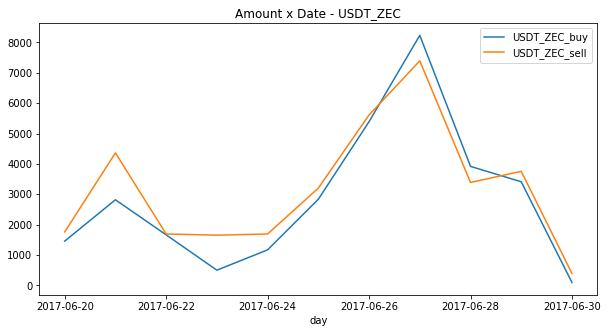

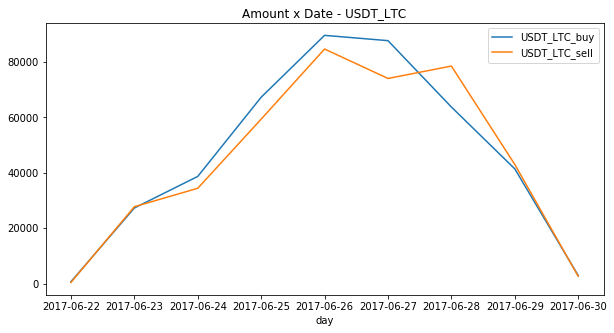

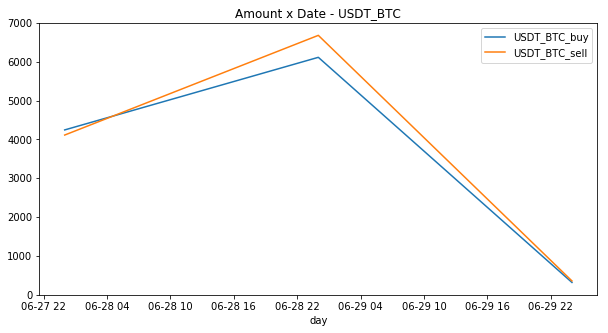

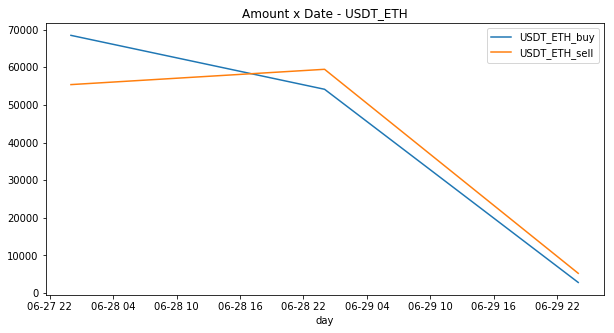

In [189]:
for coin in novo_df.coin.unique():
    fig, ax = plt.subplots(figsize=(8,6))
    for coin_type in novo_df[novo_df.coin == coin].coin_type.unique():
        novo_df[novo_df.coin_type == coin_type].plot(kind='line', y='amount', figsize=(10,5), ax=ax, label= coin_type)
    plt.title('Amount x Date - '+coin)   

In [190]:

datas = novo_df.date.unique()
data_queda = []
btc_queda = []
btc_queda_df = pd.DataFrame([])


for data in datas:
    group = novo_df[novo_df.date == data] 
    btc_result = group[group.coin == 'USDT_BTC' ]
    if not btc_result.empty  :
        #print('tem btc')
        sell_amount = btc_result[btc_result.type == 'sell']
        buy_amount = btc_result[btc_result.type == 'buy']
        
        if sell_amount.amount.sum() > buy_amount.amount.sum() :
            data_queda.append(btc_result.date.tolist()[0])

print(data_queda)

[datetime.date(2017, 6, 29), datetime.date(2017, 6, 30)]


In [191]:
dt_periodo_queda_btc = novo_df[novo_df.date.isin(data_queda)]
dt_periodo_queda_btc.head()

,amount,coin,coin_type,date,rate,type
day,,,,,,
2017-06-29,6112.487165,USDT_BTC,USDT_BTC_buy,2017-06-29,1097.356966,buy
2017-06-29,6677.960906,USDT_BTC,USDT_BTC_sell,2017-06-29,1235.447827,sell
2017-06-29,54142.219399,USDT_ETH,USDT_ETH_buy,2017-06-29,1393.584586,buy
2017-06-29,59450.930653,USDT_ETH,USDT_ETH_sell,2017-06-29,1436.712462,sell
2017-06-29,41421.051114,USDT_LTC,USDT_LTC_buy,2017-06-29,494.687900,buy


In [192]:
dt_periodo_queda_btc.pivot(columns='coin_type', values='amount').describe()

coin_type,USDT_BTC_buy,USDT_BTC_sell,USDT_ETH_buy,USDT_ETH_sell,USDT_LTC_buy,USDT_LTC_sell,USDT_ZEC_buy,USDT_ZEC_sell
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,3215.649739,3517.792361,28481.033722,32350.145758,22190.222047,22840.682302,1755.482535,2075.024882
std,4096.746777,4469.153215,36290.396811,38326.297549,27196.499281,28506.206911,2342.735219,2376.214525
min,318.812312,357.623816,2819.848045,5249.360864,2959.392981,2683.750090,98.918575,394.787477
25%,1767.231025,1937.708088,15650.440883,18799.753311,12574.807514,12762.216196,927.200555,1234.906179
50%,3215.649739,3517.792361,28481.033722,32350.145758,22190.222047,22840.682302,1755.482535,2075.024882
75%,4664.068452,5097.876633,41311.626560,45900.538206,31805.636580,32919.148408,2583.764515,2915.143584
max,6112.487165,6677.960906,54142.219399,59450.930653,41421.051114,42997.614514,3412.046495,3755.262286


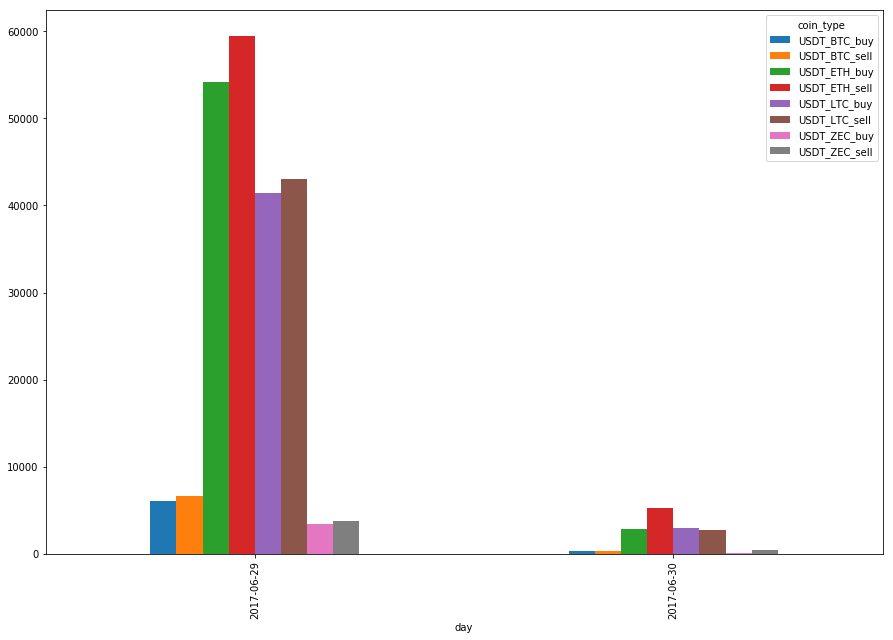

In [197]:
dt_periodo_queda_btc.pivot(columns='coin_type', values='amount').plot(kind='bar', figsize=(15,10))

In [194]:

#datas = n_dt.date.unique()
btc_queda = []
btc_queda_df = pd.DataFrame([])


for name,group in n_dt:
    btc_result = group[group.coin == 'USDT_BTC']
    if not btc_result.empty  :
        #print('tem btc')
        sell_amount = btc_result[btc_result.type == 'sell']
        buy_amount = btc_result[btc_result.type == 'buy']
        
        if sell_amount.amount.sum() > buy_amount.amount.sum() :
            #print(btc_result)            
            #btc_queda.append(btc_result)            
            #print(sell_amount.date.unique())            
            #print('venda maior que compra')
             nv = {}
             nv['day'] = group.date.tolist()[0]
             nv['coin'] = group.coin.tolist()[0]
             nv['coin_type'] = group.coin.tolist()[0]+'_'+group.type.tolist()[0]
             nv['amount'] = group.amount.sum()
             nv['rate'] = group.rate.mean()
             nv['type'] = group.type.tolist()[0]
             btc_queda.append(nv)      


btc_queda_df = pd.DataFrame(btc_queda)
#btc_queda_df.set_index('data', inplace=True)
    
#btc_queda_df.head()
print(btc_queda_df)

        amount      coin      coin_type         day         rate  type
0  4112.286669  USDT_BTC  USDT_BTC_sell  2017-06-28  1081.134590  sell
1  6677.960906  USDT_BTC  USDT_BTC_sell  2017-06-29  1235.447827  sell
2   357.623816  USDT_BTC  USDT_BTC_sell  2017-06-30  1021.139566  sell
